In [3]:
#import necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC


import warnings
warnings.filterwarnings(action='ignore')

In [4]:
shipment_data = pd.read_csv('Train.csv')

In [6]:
#data exploration
#analyse and remove unwanted data
print(shipment_data.head())

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233            

In [7]:
print(shipment_data.tail())

          ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
10994                1                  252                5   
10995                1                  232                5   
10996                4                  242                5   
10997                2                  223                6   
10998                5                  155                5   

      Product_importance Gender  Discount_offered  Weight_in_gms  \
10994             medium      F                 1           1538   
10995             medium      F                 6         

In [3]:
#natural language processing: convert strings into binary vectors
#onehot encoding

def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [4]:
shipment_data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [5]:
shipment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
#check for duplicates
shipment_data.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [9]:
#check for missing values
shipment_data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [10]:
#calculate the percentage of missing values
(shipment_data.isnull().sum()/(len(shipment_data)))*100

ID                     0.0
Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached.on.Time_Y.N    0.0
dtype: float64

In [11]:
#remove columns that do not add value to the analysis
shipment_data = shipment_data.drop(['ID'], axis = 1)
shipment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [12]:
shipment_data.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [17]:
shipment_data.describe(include='all')

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


In [6]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop ID column
    df = df.drop('ID', axis=1)
    
    # Binary encoding
    df['Gender'] = df['Gender'].replace({'F': 0, 'M': 1})
    
    # One-hot encoding
    for column in ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']:
        df = onehot_encode(df, column=column)
    
    # Split df into X and y
    y = df['Reached.on.Time_Y.N']
    X = df.drop('Reached.on.Time_Y.N', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = preprocess_inputs(shipment_data)

In [8]:
X_train

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
4177,-0.051017,1.422394,-1.289402,-0.371349,1.001690,-0.266367,0.803593,-0.443829,-0.446551,-0.445505,-0.451563,1.411463,-0.434148,-0.441940,0.689133,-0.308738,1.039891,-0.873034
1616,-0.923855,0.715649,-1.874430,-0.371349,-0.998313,3.091967,-1.245664,2.253122,-0.446551,-0.445505,-0.451563,-0.708485,-0.434148,-0.441940,0.689133,-0.308738,1.039891,-0.873034
2775,-0.051017,-1.404585,-0.683481,-0.371349,1.001690,0.355547,-1.064775,-0.443829,2.239385,-0.445505,-0.451563,-0.708485,-0.434148,-0.441940,0.689133,-0.308738,1.039891,-0.873034
10272,-0.051017,0.715649,-1.059570,-0.371349,1.001690,-0.515133,0.489031,-0.443829,-0.446551,-0.445505,2.214530,-0.708485,2.303364,-0.441940,-1.451099,-0.308738,-0.961639,1.145431
6836,-0.051017,0.008904,0.758195,-0.371349,-0.998313,-0.763898,0.963634,2.253122,-0.446551,-0.445505,-0.451563,-0.708485,-0.434148,2.262749,-1.451099,3.238988,-0.961639,-0.873034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,-0.051017,-1.404585,0.611938,-0.371349,-0.998313,-0.577324,0.701805,-0.443829,-0.446551,-0.445505,-0.451563,1.411463,2.303364,-0.441940,-1.451099,-0.308738,1.039891,-0.873034
10955,-1.796694,1.422394,-1.790855,0.290460,1.001690,-0.515133,1.363429,-0.443829,-0.446551,-0.445505,-0.451563,1.411463,2.303364,-0.441940,-1.451099,-0.308738,1.039891,-0.873034
905,-0.051017,0.715649,-1.331190,-0.371349,1.001690,-0.017602,-1.531407,-0.443829,-0.446551,-0.445505,-0.451563,1.411463,-0.434148,-0.441940,0.689133,-0.308738,1.039891,-0.873034
5192,0.821822,0.715649,0.465681,-0.371349,1.001690,-0.328559,0.879015,2.253122,-0.446551,-0.445505,-0.451563,-0.708485,-0.434148,2.262749,-1.451099,-0.308738,1.039891,-0.873034


In [9]:
y_train

4177     1
1616     1
2775     1
10272    0
6836     0
        ..
7813     0
10955    0
905      1
5192     1
235      1
Name: Reached.on.Time_Y.N, Length: 7699, dtype: int64

In [11]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.


In [12]:
print(shipment_data)

          ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   
1                    5         

In [18]:
shipment_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Warehouse_block,10999,5,F,3666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mode_of_Shipment,10999,3,Ship,7462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_care_calls,10999.0,NaN,NaN,NaN,4.054459,1.14149,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,NaN,NaN,NaN,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,NaN,NaN,NaN,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,NaN,NaN,NaN,3.567597,1.52286,2.0,3.0,3.0,4.0,10.0
Product_importance,10999,3,low,5297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10999,2,F,5545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discount_offered,10999.0,NaN,NaN,NaN,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,NaN,NaN,NaN,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0


In [20]:
#separate numerical and categorical variables for easy analysis
cat_cols = shipment_data.select_dtypes(include=['object']).columns
num_cols = shipment_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')
Numerical Variables:
['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


Customer_care_calls
Skew : 0.39


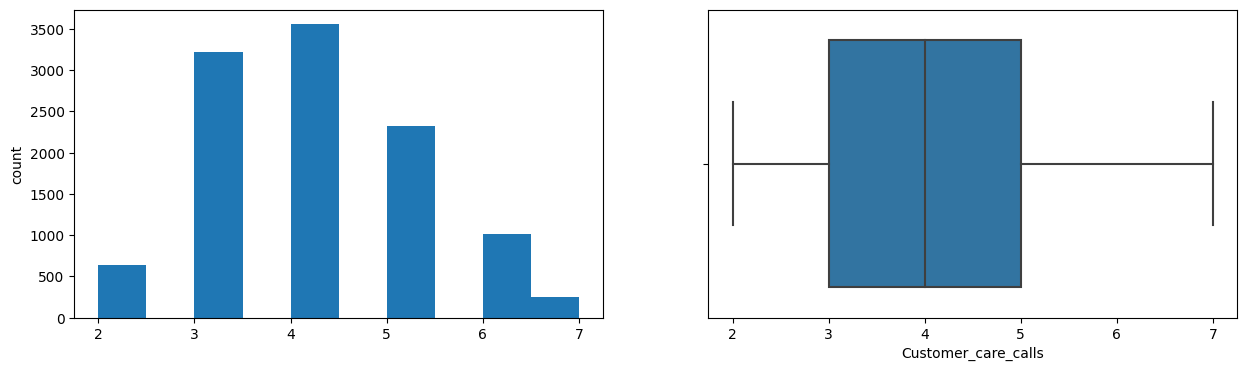

Customer_rating
Skew : 0.0


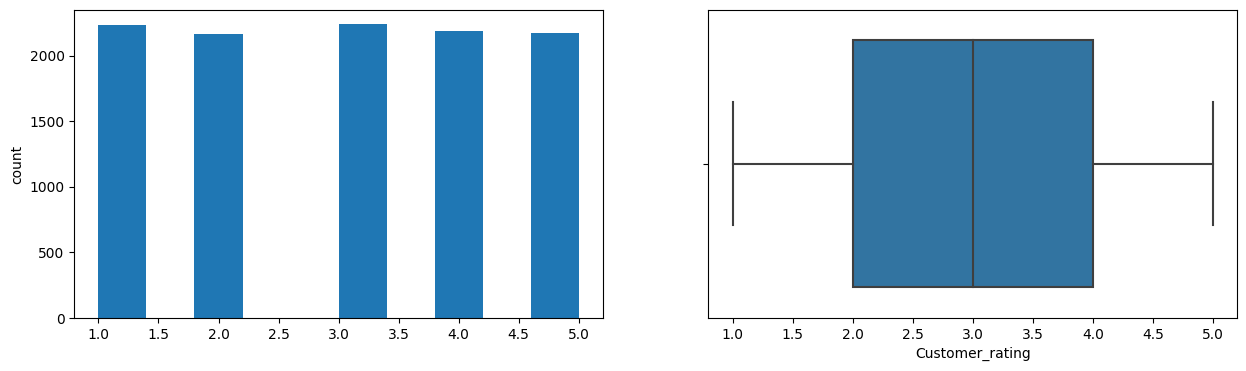

Cost_of_the_Product
Skew : -0.16


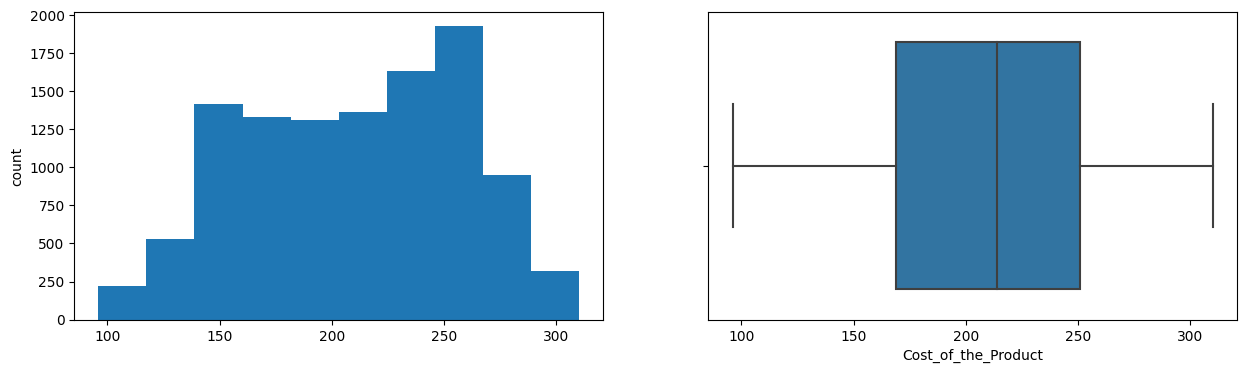

Prior_purchases
Skew : 1.68


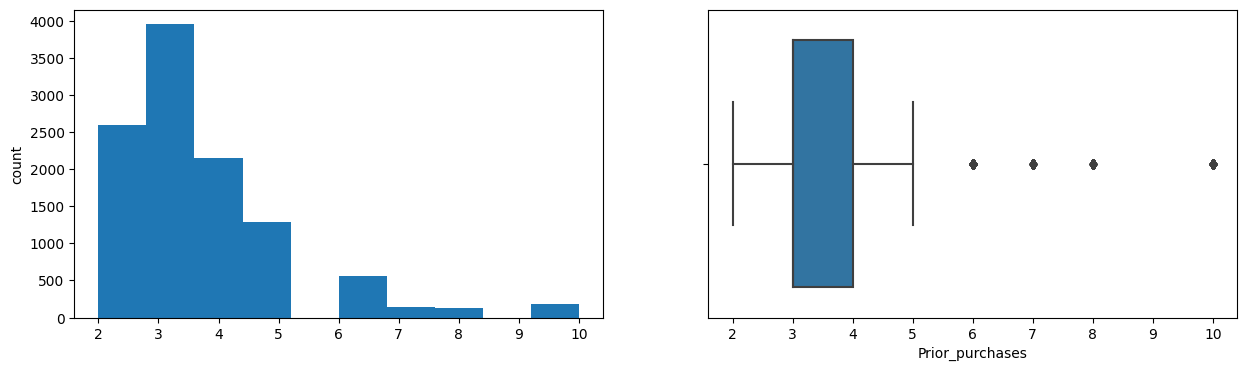

Discount_offered
Skew : 1.8


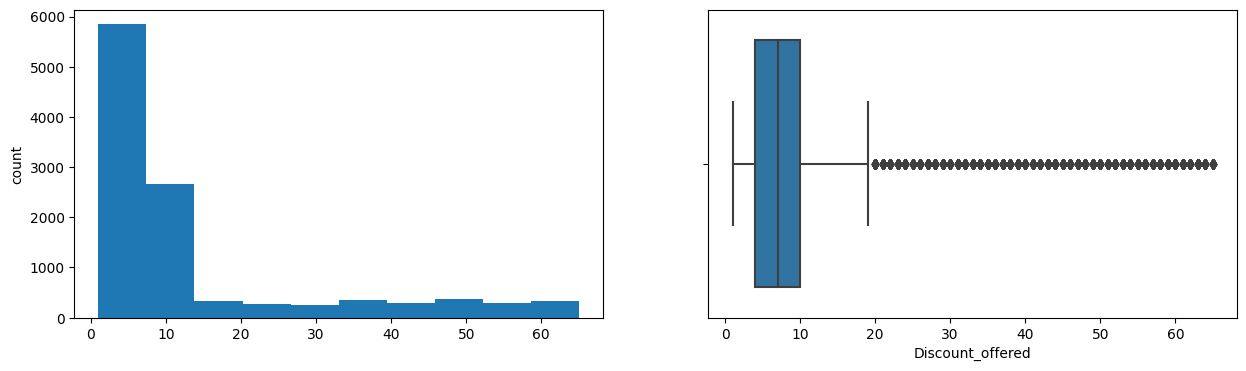

Weight_in_gms
Skew : -0.25


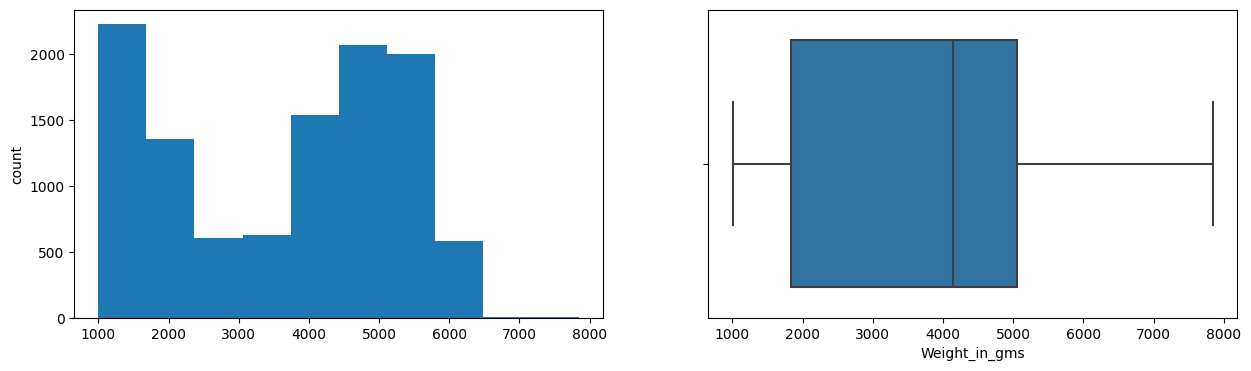

Reached.on.Time_Y.N
Skew : -0.39


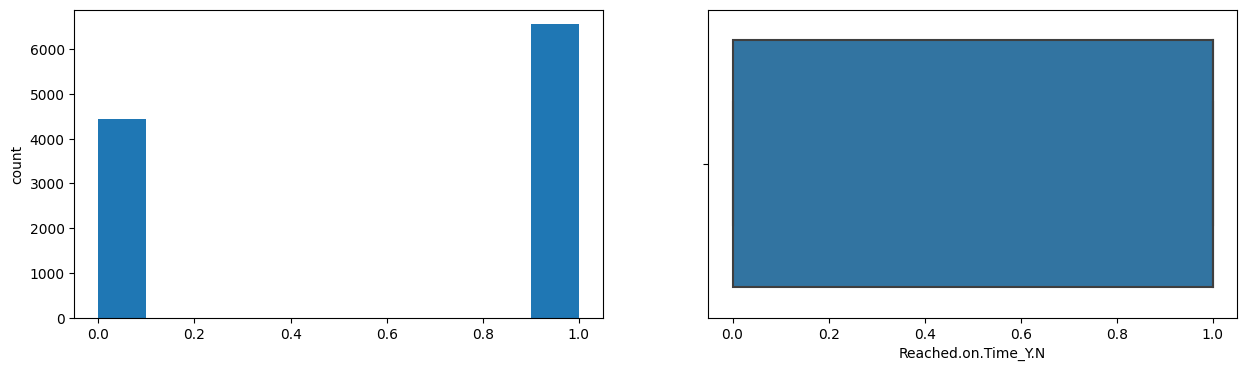

In [21]:
for col in num_cols:
    print(col)
    print('Skew :', round(shipment_data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    shipment_data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=shipment_data[col])
    plt.show()

In [24]:
#Prior purchases and mode of shipment variables are highly skewed and on a larger scale
#we need to do a log transformation so these variables can maintain a larger scale

#log transformation
def log_transform(shipment_data,col):
    for colname in col:
        if (shipment_data['prior_Purchases'] == 1.0).all():
            shipment_data['prior_Purchases' + '_log'] = np.log(shipment_data['Mode_of_Shipment']+1)
        else:
            shipment_data['Mode_of_Shipment' + '_log'] = np.log(shipment_data['Mode_of_Shipment'])
    shipment_data.info()
 

In [25]:
log_transform(shipment_data,['Mode_of_Shipment','prior_Purchases'])

KeyError: 'prior_Purchases'